<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/NLP_projs/EDA_ArabicText/sa_arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploratory Data Analysis (EDA) of Arabic Text Using Gradio




# Project description:


---
This project focuses on conducting an Exploratory Data Analysis (EDA) of Arabic text data, leveraging the capabilities of Gradio to create an interactive web application. The primary goal is to provide users with a comprehensive understanding of the characteristics and patterns within Arabic text datasets, facilitating insights that can inform further analysis or model development.


**Key Features:**


*   Interactive Visualization: Users can upload their Arabic text datasets and visualize various aspects of the data, including word frequency distributions, sentiment analysis, and text length statistics.


*   Text Preprocessing Tools: The application includes built-in functionalities for text cleaning and preprocessing, such as removing stop words, stemming, and tokenization, tailored specifically for the Arabic language.


*   Statistical Analysis: Users can explore descriptive statistics of the text data, including average word count, unique word count, and the distribution of text lengths.


*   Sentiment Analysis: The app provides sentiment scoring for the text, allowing users to gauge the overall sentiment conveyed in the Arabic text.


*   User-Friendly Interface: Built with Gradio, the web app features an intuitive interface that allows users to easily interact with the data and visualize results without requiring extensive programming knowledge.

**Technologies Used:**


*   Gradio: A powerful library for creating user-friendly web interfaces for machine learning models and data analysis tools.


*   Natural Language Processing Libraries: Libraries such as NLTK or SpaCy for Arabic text processing and analysis.


*   Data Visualization Libraries: Matplotlib, ar_wordcloud, and Seaborn for creating informative visualizations of the data.

**Target Audience:**

This project is aimed at data scientists, researchers, and students interested in Arabic language processing, as well as anyone looking to gain insights from Arabic text data through an accessible and interactive platform.

**Conclusion:**

The Exploratory Data Analysis of Arabic Text web app serves as a valuable tool for anyone looking to delve into Arabic text data. By combining the power of Python and Gradio, this project not only enhances the understanding of Arabic text but also democratizes access to data analysis tools for a broader audience.



> ## Import and process the dataset:

> ### Package installation

In [88]:
!pip install nltk ar_wordcloud pyarabic

In [89]:
#  Install required libraries
!pip install gradio pandas matplotlib plotly pyarabic nltk wordcloud ar-wordcloud


In [90]:
# import the libraries

import string
import re
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
# Import the dataset

dt_path = "/content/عينة-من-المنشورات-للتحليل.xlsx"

data= pd.read_excel(dt_path)
#data = pd.read_csv(dt_path)

In [93]:
data

,تاريخ النشر,المنشور
0,2023-01-27T11:38:06+0000,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...
1,2023-02-28T07:24:18+0000,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...
2,2023-04-19T15:47:14+0000,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...
3,2023-01-26T12:56:48+0000,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...
4,2023-02-21T07:15:03+0000,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...
5,2023-02-03T03:39:03+0000,*مركز الطوارئ والخدمات البلدي – نقطة ضوء في عم...
6,2022-01-27T13:09:04+0000,بلدية ام الفحم مناقصة رقم 2022/02 مناقصة لتنفي...
7,2022-03-18T12:04:44+0000,بلدية ام الفحم مناقصة رقم 2022/12 مناقصة لتنفي...
8,2022-08-19T02:20:07+0000,*ضمن اتفاق السقف: في الأيام القريبة المباشرة ب...
9,2022-04-21T01:38:05+0000,*تقديم طلب للجنة الجغرافية – لواء حيفا – لزياد...


In [94]:
# Display the first row

data['المنشور'][0]

'بلدية ام الفحم  مناقصة خارجية 2023/21 الرقم الديجيتالي 313 تعلن بلدية ام الفحم عن حاجتها لإشغال مدير قسم تطبيق القانون ومواقف السيارات الدرجة والتدريج: 39-37 نسبة الوظيفة: 100% التبعية: مدير جناح (تحسين ملامح المدينة ) مسؤول عن إدارة تخطيط وتشغيل قسم وقوف السيارات والإشراف البلدي: الإشراف على القوانين والأنظمة التي تدخل في اختصاص السلطة المحلية وتطبيقها كجزء من نشاط جهاز الإنفاذ البلدي من أجل الحفاظ على جدول الأعمال العام وتحسين جودة حياة سكان المدينة في السلطة المحلية. تحمل المسؤولية : إدارة قسم الإشراف ومواقف السيارات في السلطات . تفاصيل الأداء والمهام الرئيسية، كما هي مستمدة من مجالات المسؤولية: -مسؤول عن قوانين المساعدة للبلدية ولوائح وقوف السيارات والحفاظ على النظام العام. - صياغة وتنفيذ وتطبيق سياسة البلدية في مجال إنفاذ القوانين المساعدة وفقا لاحتياجات السلطة المحلية وسكانها. - القيام بأنشطة الوقاية والرقابة والردع في حالات انتهاك القوانين والأنظمة ضمن اختصاص السلطة المحلية. - العمل مع الهيئات البلدية المختلفة وتمثيل مفتشي الإدارة أمام الجهات الخارجية. - تخطيط وبناء ميزانية سنو

In [95]:
# print data records
data.head()

,تاريخ النشر,المنشور
0,2023-01-27T11:38:06+0000,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...
1,2023-02-28T07:24:18+0000,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...
2,2023-04-19T15:47:14+0000,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...
3,2023-01-26T12:56:48+0000,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...
4,2023-02-21T07:15:03+0000,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...


In [96]:
# Data columns

data.columns

Index(['تاريخ النشر', 'المنشور'], dtype='object')

In [97]:
# More infos of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   تاريخ النشر  39 non-null     object
 1   المنشور      39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [98]:
# Describe the data

data.describe().T

,count,unique,top,freq
تاريخ النشر,39,39,2023-01-27T11:38:06+0000,1
المنشور,39,39,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...,1


> ### Data preprocessing

In [99]:
# check the number of null values per column
print(data.isnull().sum())

تاريخ النشر    0
المنشور        0
dtype: int64


In [100]:
# Convert first column into datatime

# Using pandas.to_datetime() to convert pandas column to DateTime
data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], errors='coerce')
# Alternatively, you can specify the exact format:
# data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], format="%Y-%m-%dT%H:%M:%S%z", errors='coerce')
data

,تاريخ النشر,المنشور
0,2023-01-27 11:38:06+00:00,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...
1,2023-02-28 07:24:18+00:00,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...
2,2023-04-19 15:47:14+00:00,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...
3,2023-01-26 12:56:48+00:00,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...
4,2023-02-21 07:15:03+00:00,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...
5,2023-02-03 03:39:03+00:00,*مركز الطوارئ والخدمات البلدي – نقطة ضوء في عم...
6,2022-01-27 13:09:04+00:00,بلدية ام الفحم مناقصة رقم 2022/02 مناقصة لتنفي...
7,2022-03-18 12:04:44+00:00,بلدية ام الفحم مناقصة رقم 2022/12 مناقصة لتنفي...
8,2022-08-19 02:20:07+00:00,*ضمن اتفاق السقف: في الأيام القريبة المباشرة ب...
9,2022-04-21 01:38:05+00:00,*تقديم طلب للجنة الجغرافية – لواء حيفا – لزياد...


In [101]:
# Function to remove tashkeel and filter out non-Arabic words:


from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel


def removeNonArabic(text):
  list_text = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
  text = ' '.join(word for word in list_text)
  return text

'''
For testing
text = u"ِاسمٌ الكلبِ في اللغةِ الإنجليزية Dog واسمُ الحمارِ Donky"
print(type(removeNonArabic(text)))
'''

'\nFor testing\ntext = u"ِاسمٌ الكلبِ في اللغةِ الإنجليزية Dog واسمُ الحمارِ Donky"\nprint(type(removeNonArabic(text)))\n'

In [102]:
# ref: https://github.com/motazsaad/process-arabic-text/blob/master/clean_arabic_text.py
'''
The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation
Normalizing different letter variants with one common letter
'''

# first we define a list of arabic and english punctiations that we want to get rid of in our text

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!•”…“–ـ''' + string.punctuation

# Arabic stop words with nltk
stop_words = stopwords.words()

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):

    '''
    text is an arabic string input

    the preprocessed text is returned
    '''

    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)

    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)

    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    #text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    text = re.sub('[a-zA-Z0-9_]|#|http\S+@', '', text)
    text = removeNonArabic(text)


    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

In [103]:
# Apply the preprocess function

data['Feed'] = data['المنشور'].apply(preprocess)
data.head(5)


,تاريخ النشر,المنشور,Feed
0,2023-01-27 11:38:06+00:00,بلدية ام الفحم مناقصة خارجية 2023/21 الرقم ال...,بلدية ام الفحم مناقصة خارجية الرقم الديجيتالي ...
1,2023-02-28 07:24:18+00:00,*بلدية ام الفحم: الشرطة البلدية تخالف سائقَ تر...,بلدية ام الفحم الشرطة البلدية تخالف سائق تراكت...
2,2023-04-19 15:47:14+00:00,*تكريم عمال النظافة في بلدية ام الفحم من قبل م...,تكريم عمال النظافة بلدية ام الفحم مبادرة بادر ...
3,2023-01-26 12:56:48+00:00,*انطلاق مشروع استطلاع الطبيعة الحضرية في مدينة...,انطلاق مشروع استطلاع الطبيعة الحضرية مدينة ام ...
4,2023-02-21 07:15:03+00:00,*مبروك، استلم جناح تحسين ملامح المدينة في بلدي...,مبروك استلم جناح تحسين ملامح المدينة بلدية ام ...


> ## Exploratory Data Analysis (EDA):

> ### 1) Top 20 words in the dataset

In [104]:
# This function create a list of the data corpus that will be used in the EDA:

def create_corpus_df(review):
    corpus=[]

    for x in review.str.split():
        for i in x:
          corpus.append(i)
    return corpus

In [105]:
from typing import DefaultDict

corpus_reviews = create_corpus_df(data["Feed"])

dic=DefaultDict(int)

for word in corpus_reviews:
  dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
top

[('علي', 193),
 ('الفحم', 149),
 ('ام', 145),
 ('الي', 83),
 ('البلدية', 73),
 ('او', 64),
 ('بلدية', 63),
 ('البيئة', 62),
 ('النفايات', 62),
 ('ان', 61),
 ('بلدنا', 61),
 ('المدينة', 55),
 ('خلال', 44),
 ('العام', 42),
 ('العمل', 39),
 ('وحدة', 39),
 ('النظافة', 38),
 ('اهلنا', 36),
 ('المثلث', 30),
 ('اله', 30)]

In [106]:
# This function creates a bar chart of the most frequent 20 tokens

import plotly.offline as po
from plotly.offline import iplot
import plotly.graph_objs as go

freq_df = pd.DataFrame.from_records(top,
                                    columns=['token', 'count'])


def topTokensBarchart(df):
  y = freq_df['count']

  data = [go.Bar ( x = freq_df.token, y = y, name = 'Most Common Tokens in the Dataset')]
  layout = go.Layout(title = 'Bar chart of the top 20 stop words', xaxis_title="Tokens",
      yaxis_title="Counts")
  fig = go.Figure(data = data, layout = layout)
  po.plot(fig)

  # the graph will be find in html format in the temp folder

  fig.show()


topTokensBarchart(freq_df)

> ### 2) Number of Tokens per Review

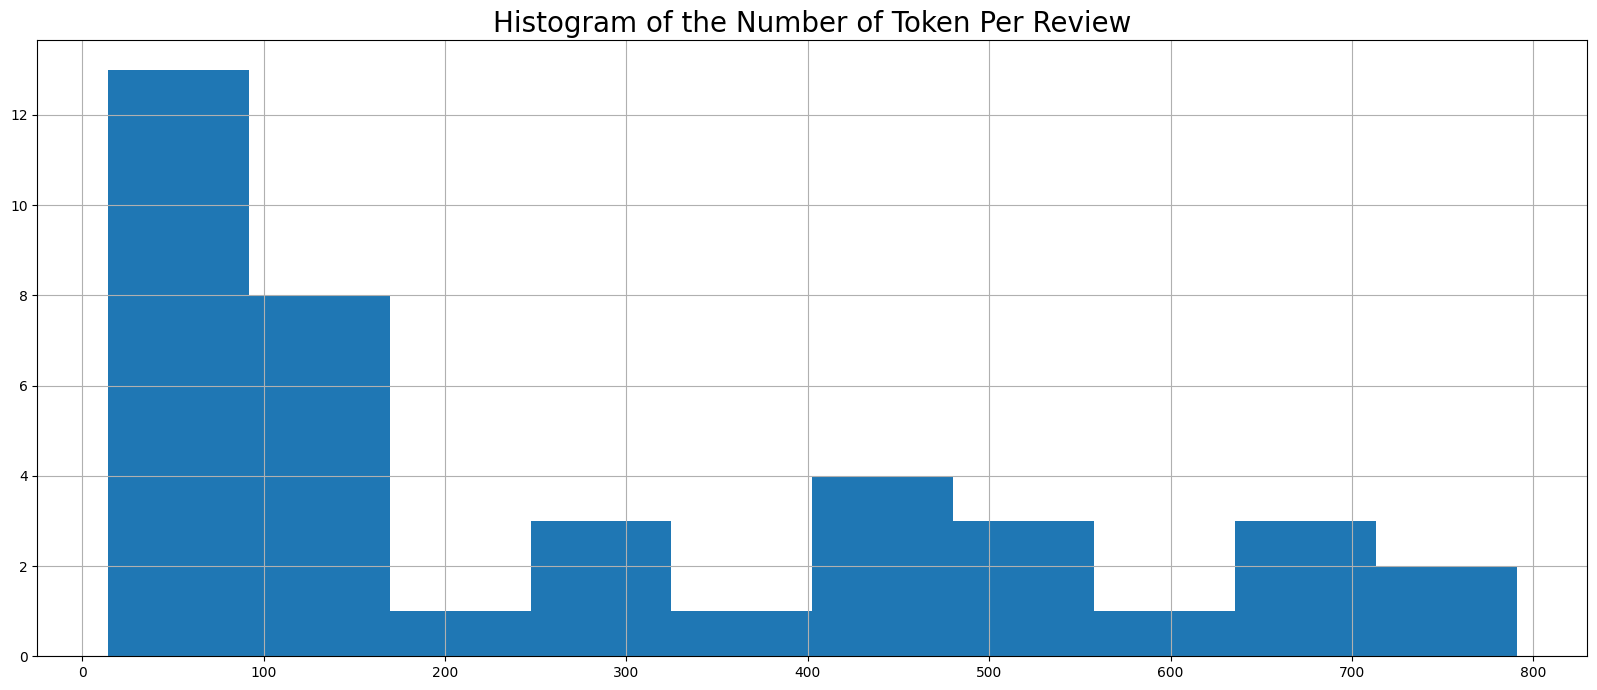

In [107]:
# This function draw a histogram for the length of reviews based on the number of tokens per review

def tokenPerReviewHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    plt.title('Histogram of the Number of Token Per Review', fontsize = 20)
    plt.gcf().set_size_inches((20, 8))
    plt.show()

tokenPerReviewHistogram(data['Feed'])



> ### 3) Number of Characters per Token

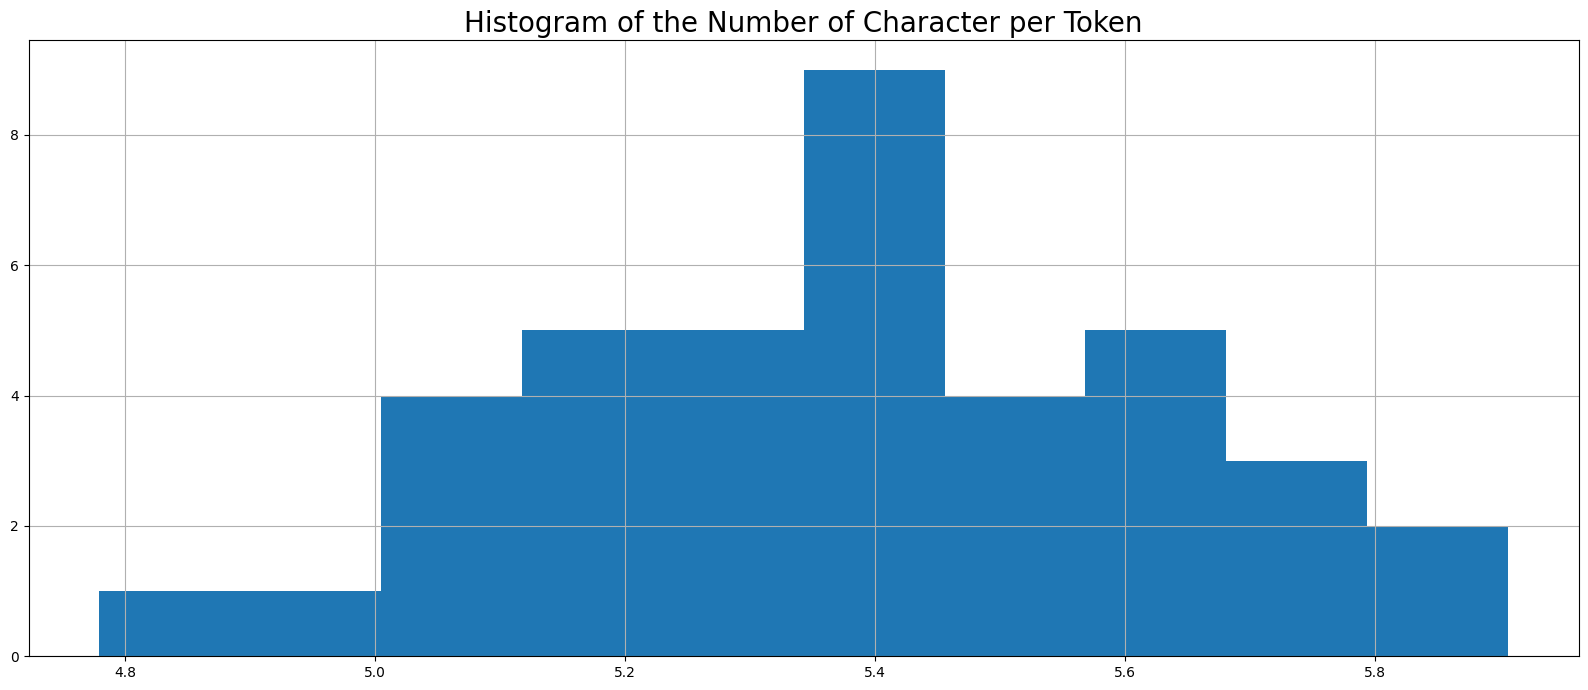

In [108]:
# This function creates a histogram based on the number of characters per token

def characterPerTokenHistogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
    plt.title('Histogram of the Number of Character per Token', fontsize = 20)
    plt.gcf().set_size_inches((20, 8))
    plt.show()


characterPerTokenHistogram(data['Feed'])

> ### 4) Word Cloud Graph

Word cloud graph provides a visual representation of the text, which could be very helpful to highlight keywords and most important terms in the textual data.  


> #### **# Non-Customized**



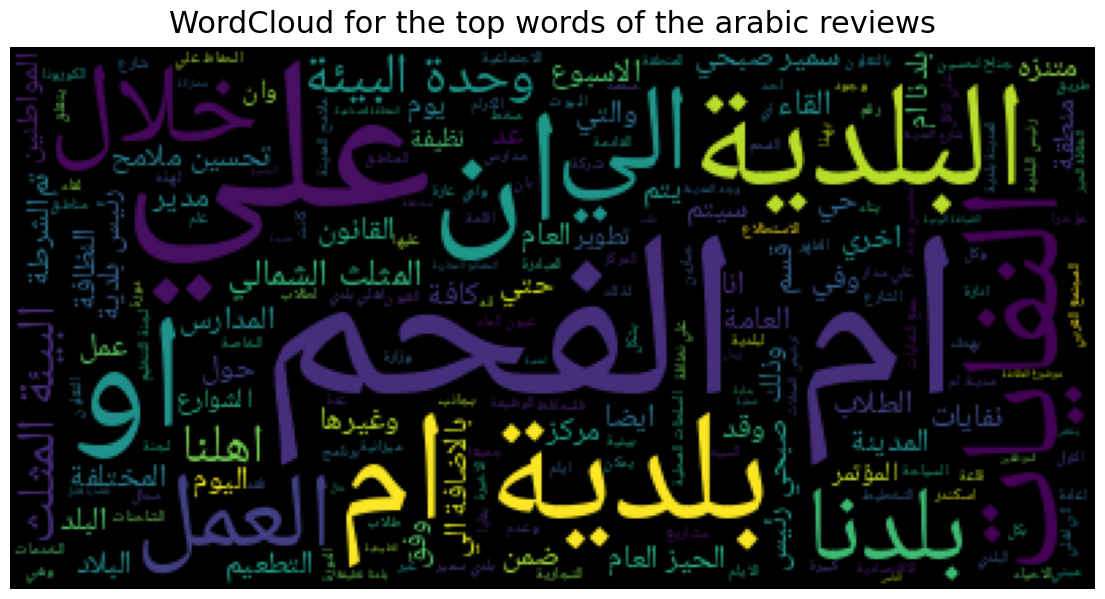

In [109]:
from PIL import Image
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
#awc = ArabicWordCloud(background_color="white")


wc = ArabicWordCloud(
    background_color='black',
    max_words=200,
)
wc.generate(' '.join(text for text in data['Feed']))
plt.figure(figsize=(14,8))
plt.title('WordCloud for the top words of the arabic reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
#plt.gcf().set_size_inches((20, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

> #### **# Customized**

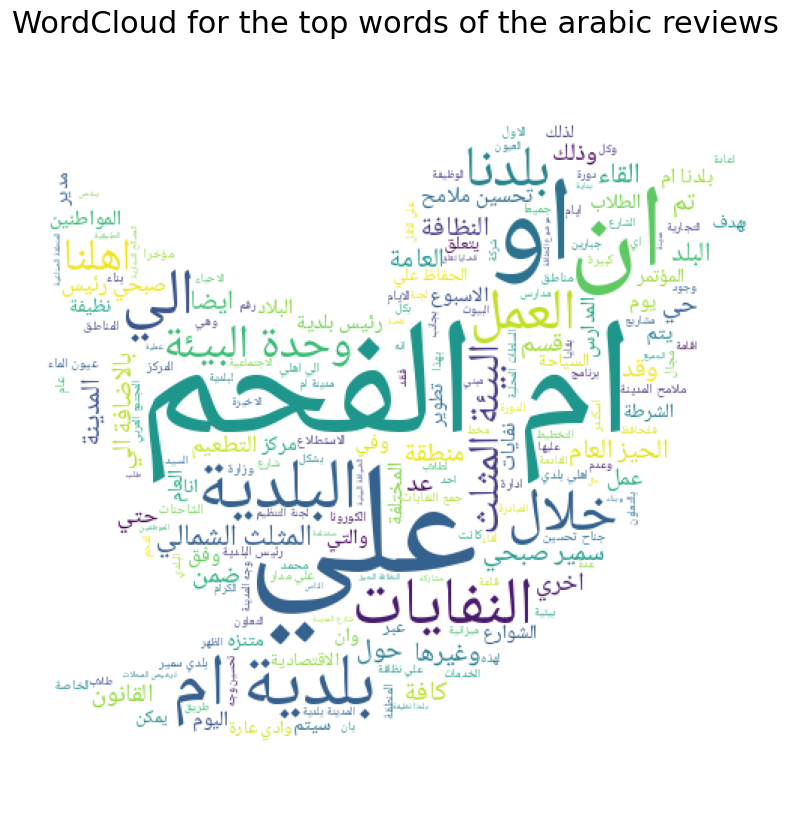

In [110]:
from PIL import Image
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
#awc = ArabicWordCloud(background_color="white")

twitter_mask = np.array(Image.open('/content/twitter_mask3.jpg'))

wc = ArabicWordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data['Feed']))
plt.figure(figsize=(20,10))
plt.title('WordCloud for the top words of the arabic reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
#plt.gcf().set_size_inches((20, 8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# The end for now.

# EDA web app of an Arabic text using Gradio

In [111]:
import string
import re
import nltk
import gradio as gr
import pandas as pd
import numpy as np
from collections import defaultdict
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
import plotly.graph_objs as go
import plotly.offline as po
import traceback

nltk.download("stopwords")
from nltk.corpus import stopwords

# Define constants
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!•”…“–ـ''' + string.punctuation
stop_words = stopwords.words('arabic')

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def removeNonArabic(text):
    list_text = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
    return ' '.join(word for word in list_text)

def preprocess(text):
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    text = re.sub(arabic_diacritics, '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    text = re.sub('[a-zA-Z0-9_]|#|http\S+@', '', text)
    text = removeNonArabic(text)
    return ' '.join(word for word in text.split() if word not in stop_words)

def create_corpus_df(review):
    corpus = []
    for x in review.str.split():
        for i in x:
            corpus.append(i)
    return corpus

def generate_plot(file):
    try:
        # Load the data
        data = pd.read_excel(file)

        # Debugging: Print the first few rows of the DataFrame
        print("Data loaded successfully. Here are the first few rows:")
        print(data.head())

        # Check if the required columns exist
        if 'تاريخ النشر' not in data.columns or 'المنشور' not in data.columns:
            raise ValueError("The uploaded file must contain 'تاريخ النشر' and 'المنشور' columns.")

        # Convert 'تاريخ النشر' to datetime
        data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], errors='coerce')

        # Preprocess the text
        data['Feed'] = data['المنشور'].apply(preprocess)
        corpus_reviews = create_corpus_df(data["Feed"])

        dic = defaultdict(int)
        for word in corpus_reviews:
            dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:20]
        freq_df = pd.DataFrame.from_records(top, columns=['token', 'count'])

        # Debugging: Print the frequency DataFrame
        print("Top tokens and their counts:")
        print(freq_df)

        # Create the bar chart
        bar_data = [go.Bar(x=freq_df['token'], y=freq_df['count'], name='Most Common Tokens')]
        layout = go.Layout(title='Bar chart of the top 20 tokens', xaxis_title="Tokens", yaxis_title="Counts")
        fig = go.Figure(data=bar_data, layout=layout)

        # Return the figure object to be displayed in Gradio
        return fig

    except Exception as e:
        # Print the error message and stack trace for debugging
        error_message = str(e)
        stack_trace = traceback.format_exc()
        print(f"Error: {error_message}\n{stack_trace}")
        return f"An error occurred: {error_message}"

# Gradio Blocks interface
with gr.Blocks() as demo:
    gr.Markdown("# Arabic Text Analysis")
    gr.Markdown("Upload your Excel file containing 'تاريخ النشر' and 'المنشور' columns to visualize the most common tokens.")

    with gr.Row () as row:
        file_input = gr.File(label="Upload Excel File")
        plot_output = gr.Plot(label="Top Tokens Plot")

    submit_button = gr.Button("Generate Plot")

    submit_button.click(fn=generate_plot, inputs=file_input, outputs=plot_output)

demo.launch()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f518f8c6dfd1c4f63.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [112]:
import string
import re
import nltk
import gradio as gr
import pandas as pd
import numpy as np
from collections import defaultdict
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
import plotly.graph_objs as go
import plotly.express as px
import traceback

nltk.download("stopwords")
from nltk.corpus import stopwords

# Define constants
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!•”…“–ـ''' + string.punctuation
stop_words = stopwords.words('arabic')

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def removeNonArabic(text):
    list_text = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
    return ' '.join(word for word in list_text)

def preprocess(text):
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    text = re.sub(arabic_diacritics, '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    text = re.sub('[a-zA-Z0-9_]|#|http\S+@', '', text)
    text = removeNonArabic(text)
    return ' '.join(word for word in text.split() if word not in stop_words)

def create_corpus_df(review):
    corpus = []
    for x in review.str.split():
        for i in x:
            corpus.append(i)
    return corpus

def generate_plot(file):
    try:
        # Load the data
        data = pd.read_excel(file)

        # Check if the required columns exist
        if 'تاريخ النشر' not in data.columns or 'المنشور' not in data.columns:
            raise ValueError("The uploaded file must contain 'تاريخ النشر' and 'المنشور' columns.")

        # Convert 'تاريخ النشر' to datetime
        data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], errors='coerce')

        # Preprocess the text
        data['Feed'] = data['المنشور'].apply(preprocess)
        corpus_reviews = create_corpus_df(data["Feed"])

        dic = defaultdict(int)
        for word in corpus_reviews:
            dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:20]
        freq_df = pd.DataFrame.from_records(top, columns=['token', 'count'])

        # Create the bar chart for the top tokens
        bar_data = [go.Bar(x=freq_df['token'], y=freq_df['count'], name='Most Common Tokens')]
        bar_layout = go.Layout(title='Bar chart of the top 20 tokens', xaxis_title="Tokens", yaxis_title="Counts")
        bar_fig = go.Figure(data=bar_data, layout=bar_layout)

        # Create histogram for the number of tokens per review
        token_counts = data['Feed'].str.split().map(len)
        token_histogram = px.histogram(token_counts, nbins=30, title='Histogram of the Number of Tokens Per Review', labels={'value': 'Number of Tokens'})

        # Create histogram for the number of characters per token
        char_counts = data['Feed'].str.split().apply(lambda x: [len(i) for i in x]).map(np.mean)
        char_histogram = px.histogram(char_counts, nbins=30, title='Histogram of the Number of Characters Per Token', labels={'value': 'Average Number of Characters'})

        # Return the figures to be displayed in Gradio
        return bar_fig, token_histogram, char_histogram

    except Exception as e:
        error_message = str(e)
        stack_trace = traceback.format_exc()
        print(f"Error: {error_message}\n{stack_trace}")
        return f"An error occurred: {error_message}", None, None

# Gradio Blocks interface
with gr.Blocks() as app:
    gr.Markdown("# Arabic Text Analysis")
    gr.Markdown("Upload your Excel file containing 'تاريخ النشر' and 'المنشور' columns to visualize the most common tokens and their statistics.")

    with gr.Row() as row:
        file_input = gr.File(label="Upload Excel File")
        bar_plot_output = gr.Plot(label="Top Tokens Plot")
        token_hist_output = gr.Plot(label="Tokens Per Review Histogram")
        char_hist_output = gr.Plot(label="Characters Per Token Histogram")

    submit_button = gr.Button("Generate Plots")

    submit_button.click(fn=generate_plot, inputs=file_input, outputs=[bar_plot_output, token_hist_output, char_hist_output])

app.launch()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://868675bb99f21b86db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [113]:
import string
import re
import nltk
import gradio as gr
import pandas as pd
import numpy as np
from collections import defaultdict
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel
import plotly.graph_objs as go
import plotly.express as px
import traceback
from PIL import Image
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud

nltk.download("stopwords")
from nltk.corpus import stopwords

# Define constants
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!•”…“–ـ''' + string.punctuation
stop_words = stopwords.words('arabic')

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def removeNonArabic(text):
    list_text = tokenize(text, conditions=is_arabicrange, morphs=strip_tashkeel)
    return ' '.join(word for word in list_text)

def preprocess(text):
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    text = re.sub(arabic_diacritics, '', text)
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("گ", "ك", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    text = re.sub('[a-zA-Z0-9_]|#|http\S+@', '', text)
    text = removeNonArabic(text)
    return ' '.join(word for word in text.split() if word not in stop_words)

def create_corpus_df(review):
    corpus = []
    for x in review.str.split():
        for i in x:
            corpus.append(i)
    return corpus

def generate_plot(file):
    try:
        # Load the data
        data = pd.read_excel(file)

        # Check if the required columns exist
        if 'تاريخ النشر' not in data.columns or 'المنشور' not in data.columns:
            raise ValueError("The uploaded file must contain 'تاريخ النشر' and 'المنشور' columns.")

        # Convert 'تاريخ النشر' to datetime
        data['تاريخ النشر'] = pd.to_datetime(data['تاريخ النشر'], errors='coerce')

        # Preprocess the text
        data['Feed'] = data['المنشور'].apply(preprocess)
        corpus_reviews = create_corpus_df(data["Feed"])

        dic = defaultdict(int)
        for word in corpus_reviews:
            dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:20]
        freq_df = pd.DataFrame.from_records(top, columns=['token', 'count'])

        # Create the bar chart for the top tokens
        bar_data = [go.Bar(x=freq_df['token'], y=freq_df['count'], name='Most Common Tokens')]
        bar_layout = go.Layout(title='Bar chart of the top 20 tokens', xaxis_title="Tokens", yaxis_title="Counts")
        bar_fig = go.Figure(data=bar_data, layout=bar_layout)

        # Create histogram for the number of tokens per review
        token_counts = data['Feed'].str.split().map(len)
        token_histogram = px.histogram(token_counts, nbins=30, title='Histogram of the Number of Tokens Per Review', labels={'value': 'Number of Tokens'})

        # Create histogram for the number of characters per token
        char_counts = data['Feed'].str.split().apply(lambda x: [len(i) for i in x]).map(np.mean)
        char_histogram = px.histogram(char_counts, nbins=30 , title='Histogram of the Number of Characters Per Token', labels={'value': 'Average Number of Characters'})

        # Generate the first word cloud
        wc = ArabicWordCloud(background_color='black', max_words=200)
        wc.generate(' '.join(text for text in data['Feed']))
        wc_image_1 = wc.to_image()

        # Generate the second word cloud with a mask
        twitter_mask = np.array(Image.open('/content/twitter_mask3.jpg'))
        wc_masked = ArabicWordCloud(background_color='white', max_words=200, mask=twitter_mask)
        wc_masked.generate(' '.join(text for text in data['Feed']))
        wc_image_2 = wc_masked.to_image()

        # Return the figures and images to be displayed in Gradio
        return bar_fig, token_histogram, char_histogram, wc_image_1, wc_image_2

    except Exception as e:
        error_message = str(e)
        stack_trace = traceback.format_exc()
        print(f"Error: {error_message}\n{stack_trace}")
        return f"An error occurred: {error_message}", None, None, None, None

# Gradio Blocks interface
with gr.Blocks() as app:
    #gr.Markdown("# Arabic Text Analysis")
    gr.Markdown("<h2 style='text-align: center;'>Arabic Text Analysis</h2>")
    gr.Markdown("Upload your Excel file containing 'تاريخ النشر' and 'المنشور' columns to visualize the most common tokens and their statistics.")

    with gr.Column():
        file_input = gr.File(label="Upload Excel File")
        submit_button = gr.Button("Generate Plots")
        bar_plot_output = gr.Plot(label="Top Tokens Plot")
        token_hist_output = gr.Plot(label="Tokens Per Review Histogram")
        char_hist_output = gr.Plot(label="Characters Per Token Histogram")
        wc_image_output_1 = gr.Image(label="Word Cloud (Black Background)")
        wc_image_output_2 = gr.Image(label="Word Cloud (Masked Background)")



    submit_button.click(fn=generate_plot, inputs=file_input, outputs=[bar_plot_output, token_hist_output, char_hist_output, wc_image_output_1, wc_image_output_2])

app.launch()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://37b7ba768d1739f91d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
